In [17]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load Overall Stats Data
Source: https://www.espn.com/nfl/standings

In [18]:
data = pd.read_csv(r'NFL Stats Past 3 Years.csv')
data

,YEAR,Team,W,L,T,PCT,PF,PA,DIFF
0,2024,Kansas City Chiefs,5,0,0,1.000,118,85,33
1,2024,Minnesota Vikings,5,0,0,1.000,139,76,63
2,2024,Houston Texans,5,1,0,0.833,143,135,8
3,2024,Detroit Lions,4,1,0,0.800,151,91,60
4,2024,Atlanta Falcons,4,2,0,0.667,149,135,14
...,...,...,...,...,...,...,...,...,...
123,2021,New York Jets,4,13,0,0.235,310,504,-194
124,2021,New York Giants,4,13,0,0.235,258,416,-158
125,2021,Houston Texans,4,13,0,0.235,280,452,-172
126,2021,Detroit Lions,3,13,1,0.206,325,467,-142


## Modify Overall Stats to be Numeric

In [19]:
# Assuming mod_data is already defined
mod_data = data[['HOME', 'AWAY', 'DIV', 'CONF']]

# Split columns into wins and losses
mod_data[['HOME_W', 'HOME_L']] = mod_data['HOME'].str.split('-', expand=True, n=1).fillna(0)
mod_data[['AWAY_W', 'AWAY_L']] = mod_data['AWAY'].str.split('-', expand=True, n=1).fillna(0)
mod_data[['DIV_W', 'DIV_L']] = mod_data['DIV'].str.split('-', expand=True, n=1).fillna(0)
mod_data[['CONF_W', 'CONF_L']] = mod_data['CONF'].str.split('-', expand=True, n=1).fillna(0)

# Concatenate mod_data with the original data
data = pd.concat([data, mod_data[['HOME_W', 'HOME_L', 'AWAY_W', 'AWAY_L', 'DIV_W', 'DIV_L', 'CONF_W', 'CONF_L']]], axis=1)
data.convert_dtypes()


KeyError: "None of [Index(['HOME', 'AWAY', 'DIV', 'CONF'], dtype='object')] are in the [columns]"

# Stats Sorted by Wins

In [689]:
data.sort_values(by=['W'], ascending=False)

,W,L,T,PCT,HOME,AWAY,DIV,CONF,PF,PA,DIFF,STRK,HOME_W,HOME_L,AWAY_W,AWAY_L,DIV_W,DIV_L,CONF_W,CONF_L
64,14,3,0,0.824,7-1,7-2,6-0,9-3,496,369,127,W5,7,1,7,2,6,0,9,3
65,14,3,0,0.824,7-2,7-1,4-2,9-3,477,344,133,W1,7,2,7,1,4,2,9,3
32,13,4,0,0.765,6-3,7-1,3-3,8-4,483,280,203,L1,6,3,7,1,3,3,8,4
68,13,4,0,0.765,8-1,5-3,4-2,8-4,424,427,-3,W1,8,1,5,3,4,2,8,4
67,13,4,0,0.765,8-1,5-3,6-0,10-2,450,277,173,W10,8,1,5,3,6,0,10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7,1,4,0,0.200,0-3,1-1,0-1,0-3,140,145,-5,L1,0,3,1,1,0,1,0,3
6,1,4,0,0.200,0-2,1-2,0-0,1-1,79,121,-42,L3,0,2,1,2,0,0,1,1
3,1,4,0,0.200,0-2,1-2,0-2,1-2,62,102,-40,L4,0,2,1,2,0,2,1,2
27,1,4,0,0.200,0-2,1-2,0-1,0-2,83,165,-82,L2,0,2,1,2,0,1,0,2


In [690]:
sorted_by_PA_data = data.sort_values(['PA'])
sorted_by_PA_data.sort_values(['PF'], ascending=False)

,W,L,T,PCT,HOME,AWAY,DIV,CONF,PF,PA,DIFF,STRK,HOME_W,HOME_L,AWAY_W,AWAY_L,DIV_W,DIV_L,CONF_W,CONF_L
100,12,5,0,0.706,5-3,7-2,6-0,10-2,530,358,172,W1,5,3,7,2,6,0,10,2
97,13,4,0,0.765,7-1,6-3,4-2,8-4,511,353,158,W3,7,1,6,3,4,2,8,4
34,12,5,0,0.706,8-0,4-5,5-1,9-3,509,315,194,W2,8,0,4,5,5,1,9,3
40,11,6,0,0.647,7-2,4-4,4-2,7-5,496,391,105,L2,7,2,4,4,4,2,7,5
64,14,3,0,0.824,7-1,7-2,6-0,9-3,496,369,127,W5,7,1,7,2,6,0,9,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10,1,3,0,0.250,0-2,1-1,0-0,1-1,79,90,-11,W1,0,2,1,1,0,0,1,1
6,1,4,0,0.200,0-2,1-2,0-0,1-1,79,121,-42,L3,0,2,1,2,0,0,1,1
14,2,2,0,0.500,1-1,1-1,1-1,1-2,68,50,18,L2,1,1,1,1,1,1,1,2
3,1,4,0,0.200,0-2,1-2,0-2,1-2,62,102,-40,L4,0,2,1,2,0,2,1,2


<h1>Overall Offense</h1>

Source: https://www.footballdb.com/stats/teamstat.html?lg=NFL&yr=2024&type=reg&cat=T&group=O&conf=

KEY: Gms = Games Played, Tot Pts = Total Points Scored, Pts/G = Points Per Game, RushYds = Rushing Yards, RYds/G = Rushing Yards Per Game, PassYds = Passing Yards, PYds/G = Passing Yards Per Game, TotYds = Total Yards, Yds/G = Yards Per Game

In [691]:
offense = pd.read_csv('Overall Offense.csv')
offense

,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G
0,Baltimore Ravens,5,147,29.4,1056,211.2,1182,236.4,2238,447.6
1,San Francisco 49ers,5,126,25.2,720,144.0,1317,263.4,2037,407.4
2,Detroit Lions,4,104,26.0,605,151.2,983,245.8,1588,397.0
3,Green Bay Packers,5,128,25.6,824,164.8,1139,227.8,1963,392.6
4,Washington Commanders,5,155,31.0,892,178.4,1071,214.2,1963,392.6
...,...,...,...,...,...,...,...,...,...,...
123,Tennessee Titans,17,305,17.9,1846,108.6,3067,180.4,4913,289.0
124,New York Giants,17,266,15.6,1874,110.2,2886,169.8,4760,280.0
125,New England Patriots,17,236,13.9,1627,95.7,3069,180.5,4696,276.2
126,New York Jets,17,268,15.8,1647,96.9,2919,171.7,4566,268.6


<h1>Overall Defense</h1>

Source: https://www.footballdb.com/stats/teamstat.html?lg=NFL&yr=2024&type=reg&cat=T&group=D&conf=

KEY: Gms = Games Played, Tot Pts = Total Points Scored, Pts/G = Points Per Game, RushYds = Rushing Yards, RYds/G = Rushing Yards Per Game, PassYds = Passing Yards, PYds/G = Passing Yards Per Game, TotYds = Total Yards, Yds/G = Yards Per Game

In [692]:
defense = pd.read_csv('Overall Defense.csv')
defense

,Team,Gms,Tot Pts,Pts/G,RushYds,RYds/G,PassYds,PYds/G,TotYds,Yds/G
0,Tennessee Titans,4,90,22.5,479,119.8,496,124.0,975,243.8
1,New York Jets,5,85,17.0,596,119.2,683,136.6,1279,255.8
2,Denver Broncos,5,73,14.6,557,111.4,799,159.8,1356,271.2
3,Houston Texans,5,114,22.8,601,120.2,770,154.0,1371,274.2
4,Los Angeles Chargers,4,50,12.5,376,94.0,754,188.5,1130,282.5
...,...,...,...,...,...,...,...,...,...,...
123,Seattle Seahawks,17,366,21.5,1932,113.6,4513,265.5,6445,379.1
124,Detroit Lions,17,467,27.5,2296,135.1,4160,244.7,6456,379.8
125,Minnesota Vikings,17,426,25.1,2222,130.7,4300,252.9,6522,383.6
126,Houston Texans,17,452,26.6,2418,142.2,4117,242.2,6535,384.4


# AFC Playoff Standings
Source: https://www.espn.com/nfl/standings/_/view/playoff

Glossary

    W:Wins
    L:Losses
    T:Ties
    PCT:Winning Percentage
    DIV:Division Record
    CONF:Conference Record
    SOS:Strength of Schedule
    SOV:Strength of Victory
    REASON:Conference Tie Break Used

In [693]:
afc_playoff = pd.read_csv('AFC Playoff Standings.csv')
afc_playoff

,TEAM,W,L,T,PCT,DIV,CONF,SOS,SOV,Reason
0,Kansas City Chiefs,5,0,0,1.00,1-0,3-0,0.458,0.458,--
1,Houston Texans,4,1,0,0.80,2-0,3-0,0.560,0.450,--
2,Baltimore Ravens,3,2,0,0.60,1-0,2-2,0.560,0.467,Wins tie break over Buffalo based on head-to-h...
3,Buffalo Bills,3,2,0,0.60,1-0,2-2,0.480,0.333,--
4,Pittsburgh Steelers,3,2,0,0.60,0-0,2-1,0.542,0.571,Wins tie break over Denver based on head-to-he...
5,Denver Broncos,3,2,0,0.60,1-0,2-1,0.520,0.467,--
6,Los Angeles Chargers,2,2,0,0.50,1-1,1-2,0.550,0.300,--
7,New York Jets,2,3,0,0.40,1-0,2-1,0.500,0.222,Wins tie break over Indianapolis and Las Vegas...
8,Las Vegas Raiders,2,3,0,0.40,0-2,2-2,0.417,0.400,Wins tie break over Miami based on strength of...
9,Miami Dolphins,2,3,0,0.40,1-1,2-2,0.375,0.200,Wins tie break over Indianapolis based on best...


# NFC Playoff Standings
Source: https://www.espn.com/nfl/standings/_/view/playoff

Glossary

    W:Wins
    L:Losses
    T:Ties
    PCT:Winning Percentage
    DIV:Division Record
    CONF:Conference Record
    SOS:Strength of Schedule
    SOV:Strength of Victory
    REASON:Conference Tie Break Used

In [694]:
nfc_playoff = pd.read_csv('NFC Playoff Standings.csv')
nfc_playoff

,TEAM,W,L,T,PCT,DIV,CONF,SOS,SOV,Reason
0,Minnesota Vikings,5,0,0,1.00,1-0,3-0,0.520,0.520,--
1,Washington Commanders,4,1,0,0.80,1-0,2-1,0.360,0.300,--
2,Atlanta Falcons,3,2,0,0.60,2-0,3-0,0.625,0.500,Wins tie break over Seattle based on best win ...
3,Seattle Seahawks,3,2,0,0.60,0-0,0-2,0.458,0.400,--
4,Detriot Lions,3,1,0,0.75,0-0,3-1,0.450,0.400,--
5,Tampa Bay Buccaneers,3,2,0,0.60,0-1,3-1,0.652,0.692,Wins tie break over Dallas and Green Bay based...
6,Dallas Cowboys,3,2,0,0.60,1-0,1-1,0.440,0.400,Wins tie break over Green Bay based on best wi...
7,Green Bay Packers,3,2,0,0.60,0-1,1-2,0.478,0.286,Wins tie break over Chicago based on best win ...
8,Chicago Bears,3,2,0,0.60,0-0,2-0,0.375,0.214,--
9,Philadelphia Eagles,2,2,0,0.50,0-0,2-2,0.550,0.500,--


# Data Analysis of Teams

In [695]:
# Correlation Analysis
data[['W','L','T','PCT','HOME_W','HOME_L','AWAY_W','AWAY_L','DIV_W','DIV_L','CONF_W','CONF_L','PF','PA','DIFF']].corr()

,W,L,T,PCT,HOME_W,HOME_L,AWAY_W,AWAY_L,DIV_W,DIV_L,CONF_W,CONF_L,PF,PA,DIFF
W,1.000000,0.027502,-0.057970,0.635421,0.898943,-0.023128,0.874594,0.068414,0.842793,0.070250,0.945664,0.073076,0.898167,0.529458,0.611672
L,0.027502,1.000000,0.185643,-0.633713,0.059304,0.887126,-0.014221,0.906470,0.070167,0.841494,0.078420,0.945534,0.371653,0.813422,-0.607513
T,-0.057970,0.185643,1.000000,-0.142885,-0.045214,0.170135,-0.058335,0.163297,-0.029400,0.106936,-0.046232,0.177339,0.020580,0.168400,-0.212266
PCT,0.635421,-0.633713,-0.142885,1.000000,0.565302,-0.592290,0.562272,-0.546896,0.480500,-0.500077,0.561893,-0.569417,0.329285,-0.186007,0.774668
HOME_W,0.898943,0.059304,-0.045214,0.565302,1.000000,-0.158324,0.573812,0.246751,0.761639,0.098188,0.845298,0.111549,0.809189,0.506192,0.508814
HOME_L,-0.023128,0.887126,0.170135,-0.592290,-0.158324,1.000000,0.131996,0.609263,0.012844,0.744350,0.030119,0.823162,0.294651,0.693186,-0.551576
AWAY_W,0.874594,-0.014221,-0.058335,0.562272,0.573812,0.131996,1.000000,-0.145203,0.732658,0.022659,0.832384,0.013156,0.783554,0.429592,0.580393
AWAY_L,0.068414,0.906470,0.163297,-0.546896,0.246751,0.609263,-0.145203,1.000000,0.108804,0.764766,0.107179,0.871414,0.368963,0.763347,-0.539131
DIV_W,0.842793,0.070167,-0.029400,0.480500,0.761639,0.012844,0.732658,0.108804,1.000000,-0.161413,0.875811,0.042971,0.781520,0.468125,0.521474
DIV_L,0.070250,0.841494,0.106936,-0.500077,0.098188,0.744350,0.022659,0.764766,-0.161413,1.000000,0.041468,0.870842,0.347191,0.725169,-0.517259


#### Results Interpretation

Based off of the results above mpst of the variables have a high correlation with on another. What I am specifically focusing on are the PF, PA, and DIFF because they have high correlationships with Wins and Losses

Coefficients: [0.7007181  0.01685781 0.00270684 0.01415097]
Standard Errors: [     0.         100924.68665378 100924.68665378 100924.68665378]
t-statistics: [           inf 1.67033541e-07 2.68203943e-08 1.40213147e-07]
R-squared: 0.8562897306072574
Adjusted R-squared: 0.8503838291253639
Mean Squared Error: 2.2483664342841636
R² Score: 0.8562897306072574


/tmp/ipykernel_72732/2935264420.py:40: RuntimeWarning: divide by zero encountered in divide
  t_stats = coefficients / np.append(0, standard_errors)  # Intercept's SE is zero


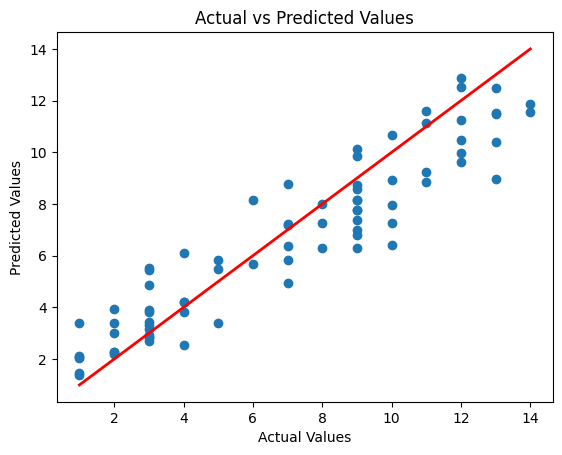

In [696]:
# Regression Analysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = data[['PF','PA','DIFF']]
y = data['W']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate standard errors
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
sigma_squared = np.sum(residuals**2) / (n - p - 1)  # Variance of residuals

# Ensure X_test is a 2D array
X_test = np.array(X_test)

# Calculate standard errors
# Handle cases where X_test is not full rank
try:
    XTX_inv = np.linalg.inv(np.dot(X_test.T, X_test))
    standard_errors = np.sqrt(sigma_squared * np.diag(XTX_inv))
except np.linalg.LinAlgError:
    print("X_test is not full rank, cannot compute standard errors.")
    standard_errors = np.full(p, np.nan)  # Placeholder for standard errors

# Calculate t-statistics
coefficients = np.append(model.intercept_, model.coef_)
t_stats = coefficients / np.append(0, standard_errors)  # Intercept's SE is zero

# Print results
print("Coefficients:", coefficients)
print("Standard Errors:", np.append(0, standard_errors))  # Intercept's SE is zero
print("t-statistics:", t_stats)

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

# Calculate adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r_squared}')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()

# Logistic Regression

Coefficients: [-1.24985096 -0.35097969 -0.131141   -0.42491238  0.47543439 -0.10950819
  1.44792807  1.12682533  0.94733075  0.47473489 -0.13393715 -0.75401568
 -1.31790838 -0.8386281  -0.57833802 -0.33308171 -1.31582702 -0.56872996
 -0.92895537 -0.94470541 -0.41793559 -0.65541611 -0.13393475  1.02286104
 -1.39116126 -0.39764457 -0.2953465  -0.13259453 -0.37574728  0.18348683
 -0.68024958 -0.01420485  0.23252076 -0.29635565  0.2764633   0.30520834
 -0.02762766  0.77224614  0.45146929  0.40400248  0.56256081  0.01253705
  0.67383418  0.56527736 -0.34851762  1.11032756  1.26948146  0.40326007
  1.07072225  0.57466289 -0.4024757   1.1865554 ]
Standard Errors: [     0.         100924.68665378 100924.68665378 100924.68665378]
R-squared: 0.7800237171194481
Adjusted R-squared: 0.7709835959051788
Mean Squared Error: 3.4415584415584415
R² Score: 0.7800237171194481


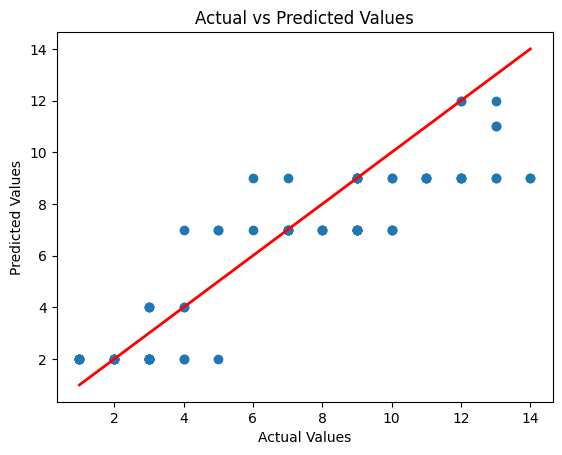

Confusion Matrix:
[[0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 6 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 9 0 3 0 0 0 0 0 0 0 0 0 0]
 [0 2 0 2 0 0 1 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 2 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 5 0 1 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 6 0 6 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 2 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 4 0 0 2 0 0]
 [0 0 0 0 0 0 0 0 2 0 2 1 0 0]
 [0 0 0 0 0 0 0 0 2 0 0 0 0 0]]

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         6
           2       0.25      1.00      0.40         6
           3       0.00      0.00      0.00        12
           4       0.40      0.40      0.40         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         2
           7       0.24      0.83      0.37         6
           8       0.00      0.00      0.00         3
           9       0.27      0.50   

/home/usacys/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usacys/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/usacys/.local/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [697]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=42)

# Step 4: Feature scaling (optional)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 5: Build the logistic regression model
model = LogisticRegression()

# Step 6: Train the model
model.fit(X_train, y_train)

# Step 7: Make predictions
y_pred = model.predict(X_test)

# Calculate t-statistics
coefficients = np.append(model.intercept_, model.coef_)

# Print results
print("Coefficients:", coefficients)
print("Standard Errors:", np.append(0, standard_errors))  # Intercept's SE is zero

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print(f'R-squared: {r_squared}')

# Calculate adjusted R-squared
adjusted_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r_squared}')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()

# Step 8: Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

offense_df = pd.read_csv("Overall Offense.csv")


offensive_columns = {
    "Gms" : "Gms_Off",
    "Tot Pts" : "Tot_Pts_Off",
    "Pts/G" : "Pts/G_Off",
    "RushYds" : "RushYds_Off",
    "RYds/G" : "RYds/G_Off",
    "PassYds" : "PassYds_Off",
    "PYds/G" : "PYds/G_Off",
    "TotYds" : "TotYds_Off",
    "Yds/G" : "Yds/G_Off"
}

offense_df.rename(columns=offensive_columns, inplace=True)

defense_df = pd.read_csv("Overall Defense.csv")

defensive_columns = {
    "Gms" : "Gms_Def",
    "Tot Pts" : "Tot_Pts_Def",
    "Pts/G" : "Pts/G_Def",
    "RushYds" : "RushYds_Def",
    "RYds/G" : "RYds/G_Def",
    "PassYds" : "PassYds_Def",
    "PYds/G" : "PYds/G_Def",
    "TotYds" : "TotYds_Def",
    "Yds/G" : "Yds/G_Def"
}

defense_df.rename(columns=defensive_columns, inplace=True)


overall_df = pd.read_csv("NFL Stats Past 3 Years.csv")

print(offense_df.head())
print(defense_df.head())
print(overall_df.head())

combined_df = pd.merge(offense_df, defense_df, on=['YEAR', 'Team'], how='inner')  # Change 'outer' to 'inner' if needed

final_df = pd.merge(overall_df, combined_df, on=['YEAR', 'Team'], how = 'outer')

final_df.to_csv("Cleaned_Overall_Dataset.csv")

   YEAR                   Team  Gms_Off  Tot Pts  Pts/G_Off  RushYds_Off  \
0  2024       Baltimore Ravens        5      147       29.4         1056   
1  2024    San Francisco 49ers        5      126       25.2          720   
2  2024          Detroit Lions        4      104       26.0          605   
3  2024      Green Bay Packers        5      128       25.6          824   
4  2024  Washington Commanders        5      155       31.0          892   

   RYds/G_Off  PassYds_Off  PYds/G_Off  TotYds_Off  Yds/G_Off  
0       211.2         1182       236.4        2238      447.6  
1       144.0         1317       263.4        2037      407.4  
2       151.2          983       245.8        1588      397.0  
3       164.8         1139       227.8        1963      392.6  
4       178.4         1071       214.2        1963      392.6  
   YEAR                  Team  Gms_Def  Tot Pts  Pts/G_Def  RushYds_Def  \
0  2024      Tennessee Titans        4       90       22.5          479   
1  2024  

In [2]:
TEAM = 'Carolina Panthers'


final_df
df = final_df.groupby('Team')
df = final_df.query(f'Team == "{TEAM}"')
df

,YEAR,Team,W,L,T,PCT,PF,PA,DIFF,Gms_Off,...,Yds/G_Off,Gms_Def,Tot Pts_y,Pts/G_Def,RushYds_Def,RYds/G_Def,PassYds_Def,PYds/G_Def,TotYds_Def,Yds/G_Def
4,2021,Carolina Panthers,5,12,0,0.294,304,404,-100,17,...,265.3,17,404,23.8,1935,113.8,3266,192.1,5201,305.9
36,2022,Carolina Panthers,7,10,0,0.412,347,374,-27,17,...,265.3,17,374,22.0,2085,122.6,3868,227.5,5953,350.2
68,2023,Carolina Panthers,2,15,0,0.118,236,416,-180,17,...,265.3,17,416,24.5,2081,122.4,2916,171.5,4997,293.9
100,2024,Carolina Panthers,1,5,0,0.167,103,203,-100,5,...,291.2,5,165,33.0,723,144.6,1133,226.6,1856,371.2


Coefficients: [ 5.33753302e-01  8.22341254e-03  2.71630487e-04  1.46030513e-03
 -3.30495622e-02 -5.49071055e-04  1.04043225e-03]
Standard Errors: [0.         0.00818989 0.00110572 0.00089694 0.00795583 0.0011331
 0.00072581]
t-statistics: [        inf  1.00409267  0.24565929  1.6280896  -4.15413077 -0.48457559
  1.43348147]
Adjusted R-squared: 0.5442860864457704
Mean Squared Error: 0.012556397601766323
R² Score: 0.6093880740963746


C:\Users\kinne\AppData\Local\Temp\ipykernel_13716\584194812.py:39: RuntimeWarning: divide by zero encountered in divide
  t_stats = coefficients / np.append(0, standard_errors)  # Intercept's SE is zero


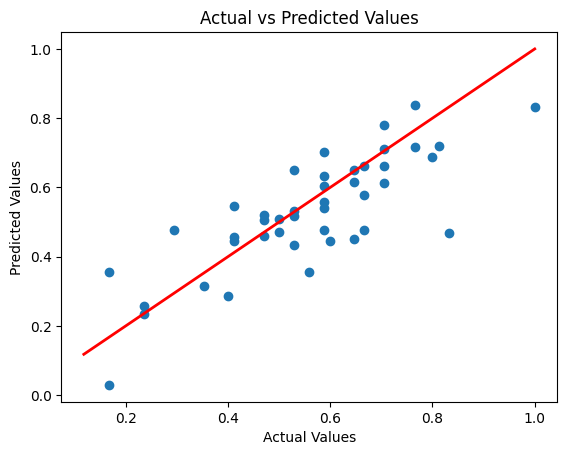

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = final_df[['Pts/G_Off', 'RYds/G_Off', 'PYds/G_Off', 'Pts/G_Def','RYds/G_Def', 'PYds/G_Def']]
y = final_df['PCT']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate residuals
residuals = y_test - y_pred

# Calculate standard errors
n = X_test.shape[0]  # Number of observations
p = X_test.shape[1]  # Number of predictors
sigma_squared = np.sum(residuals**2) / (n - p - 1)  # Variance of residuals

# Ensure X_test is a 2D array
X_test = np.array(X_test)

# Calculate standard errors
# Handle cases where X_test is not full rank
try:
    XTX_inv = np.linalg.inv(np.dot(X_test.T, X_test))
    standard_errors = np.sqrt(sigma_squared * np.diag(XTX_inv))
except np.linalg.LinAlgError:
    print("X_test is not full rank, cannot compute standard errors.")
    standard_errors = np.full(p, np.nan)  # Placeholder for standard errors

# Calculate t-statistics
coefficients = np.append(model.intercept_, model.coef_)
t_stats = coefficients / np.append(0, standard_errors)  # Intercept's SE is zero

# Print results
print("Coefficients:", coefficients)
print("Standard Errors:", np.append(0, standard_errors))  # Intercept's SE is zero
print("t-statistics:", t_stats)

r2 = r2_score(y_test, y_pred)
# Calculate adjusted R-squared
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print(f'Adjusted R-squared: {adjusted_r_squared}')

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)


print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()

In [4]:
TEAM = 'Carolina Panthers'


final_df
df = final_df.groupby('Team')
df = final_df.query(f'Team == "{TEAM}"')
df[['YEAR', 'Team', 'Pts/G_Off', 'RYds/G_Off','PYds/G_Off','Pts/G_Def','RYds/G_Def','PYds/G_Def']]

,YEAR,Team,Pts/G_Off,RYds/G_Off,PYds/G_Off,Pts/G_Def,RYds/G_Def,PYds/G_Def
4,2021,Carolina Panthers,13.9,104.1,161.2,23.8,113.8,192.1
36,2022,Carolina Panthers,13.9,104.1,161.2,22.0,122.6,227.5
68,2023,Carolina Panthers,13.9,104.1,161.2,24.5,122.4,171.5
100,2024,Carolina Panthers,16.6,110.8,180.4,33.0,144.6,226.6


In [5]:
def predict_y(X, coefficients):
    # Coefficients
    intercept = coefficients[0]
    coeffs = coefficients[1:]

    # Calculate the predicted value
    Y = intercept
    for i in range(len(coeffs)):
        Y += coeffs[i] * X[i]
    
    return Y

# Points scored per game parameter
VALUE_1 = 16.6

# Offensive Rushing yards per game parameter
VALUE_2 = 110.8

# Offensive Passing yards per game parameter
VALUE_3 = 180.4

# Points allowed per game parameter
VALUE_4 = 33.0

# Defensive Rushing yards per game parameter
VALUE_5 = 144.6

# Defensive Passing Yards per game parameter
VALUE_6 = 226.6

# Example usage
X_values = [VALUE_1, VALUE_2, VALUE_3, VALUE_4, VALUE_5, VALUE_6]  # Replace with actual values
predicted_y = predict_y(X_values, coefficients)
print(f'Predicted Y: {predicted_y}')
print(f'Estimated Winning Games: {predicted_y * 17}')


# Points scored per game parameter
VALUE_1 = 27.8

# Offensive Rushing yards per game parameter
VALUE_2 = 115.4

# Offensive Passing yards per game parameter
VALUE_3 = 207.8

# Points allowed per game parameter
VALUE_4 = 15.2

# Defensive Rushing yards per game parameter
VALUE_5 = 67.2

# Defensive Passing Yards per game parameter
VALUE_6 = 263.0

# Example usage
X_values = [VALUE_1, VALUE_2, VALUE_3, VALUE_4, VALUE_5, VALUE_6]  # Replace with actual values
predicted_y = predict_y(X_values, coefficients)
print(f'Predicted Y: {predicted_y}')
print(f'Estimated Winning Games: {predicted_y * 17}')


Predicted Y: 0.02952837560604496
Estimated Winning Games: 0.5019823853027643
Predicted Y: 0.8315444967691215
Estimated Winning Games: 14.136256445075064


Epoch 1/100


C:\Users\kinne\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - loss: 1.1007 - mae: 0.5509 - val_loss: 0.9098 - val_mae: 0.3756
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.9688 - mae: 0.4349 - val_loss: 0.8479 - val_mae: 0.2997
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.9004 - mae: 0.3481 - val_loss: 0.8136 - val_mae: 0.2460
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8455 - mae: 0.2717 - val_loss: 0.7996 - val_mae: 0.2148
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.8186 - mae: 0.2478 - val_loss: 0.7953 - val_mae: 0.2004
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.7965 - mae: 0.2299 - val_loss: 0.7905 - val_mae: 0.2073
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7863 - mae: 0.2303 - val_loss: 0.7814 - val_mae: 0.2098
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.7696 - mae: 0.2174 - val_loss: 0.7677 - val_mae: 0.2075
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.7507 - mae: 0.2067 - va

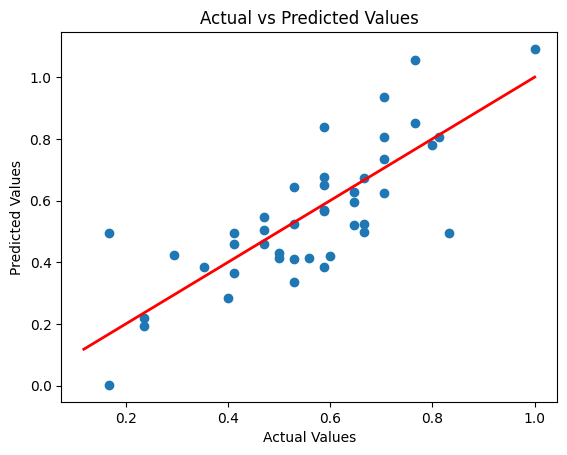

In [34]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming final_df is already defined
X = final_df[['Pts/G_Off', 'RYds/G_Off', 'PYds/G_Off', 'Pts/G_Def','RYds/G_Def', 'PYds/G_Def']]
y = final_df['PCT']


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=25)

# Convert to NumPy arrays (if they are pandas DataFrames or Series)
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

# Normalize the data (optional, but recommended for neural networks)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer with 64 neurons
    tf.keras.layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    tf.keras.layers.Dense(1)  # Output layer with 1 neuron for regression
])

from tensorflow.keras import regularizers

model = Sequential()
model.add(Dense(64, activation='relu', 
                kernel_regularizer=regularizers.l2(0.01), 
                input_shape=(X_train.shape[1],)))
model.add(Dense(64, activation='relu', 
                kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(1, activation='linear'))


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=48, validation_split=0.2, verbose=1)

# Make predictions
y_pred = model.predict(X_test).flatten()

# Calculate residuals
residuals = y_test - y_pred

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Calculate Adjusted R²
n = X_test.shape[0]
p = X_test.shape[1]
adjusted_r_squared = 1 - (1 - r2) * (n - 1) / (n - p - 1)

# Print metrics
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')
print(f'Adjusted R-squared: {adjusted_r_squared}')

# Visualize results
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', lw=2)
plt.show()


In [36]:
# Points scored per game parameter
VALUE_1 = 16.6

# Offensive Rushing yards per game parameter
VALUE_2 = 110.8

# Offensive Passing yards per game parameter
VALUE_3 = 180.4

# Points allowed per game parameter
VALUE_4 = 33.0

# Defensive Rushing yards per game parameter
VALUE_5 = 144.6

# Defensive Passing Yards per game parameter
VALUE_6 = 226.6

# Example usage
X_values = [[VALUE_1, VALUE_2, VALUE_3, VALUE_4, VALUE_5, VALUE_6]]  # Replace with actual values

y_pred = model.predict(np.array(X_values))
print("Predicted Value: ", y_pred / 100 * 17)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicted Value:  [[3.0153162]]
